# Data storytelling


For this project, I will be analyzing NBA player performance, focusing specifically on how different game metrics contribute to player efficiency. The NBA is one of the most competitive basketball leagues in the world, with teams playing an 82-game regular season. Each game generates loads of data, from points scored to shooting percentages, rebounds, and turnovers. By analyzing this data, I can gain insights into what makes players truly efficient on the court.

Using this dataset, I built models to predict a player’s Game Score (GmSc)—a comprehensive metric that summarizes a player’s overall performance in a game. I trained machine learning models, like Random Forest and Gradient Boosting, to determine which performance metrics are most important for predicting efficiency. These models also highlight how factors such as scoring, assists, and playing time contribute to a player’s impact.

I’ll focus on the most important metrics identified by the models and analyze how they relate to efficiency during games. Additionally, I’ll explore how well these metrics align with actual performance patterns and discuss actionable insights for improving efficiency.

Ultimately, the goal of this project is to understand what drives NBA player efficiency, helping teams and players focus on the areas that matter most to achieving success on the court.

# Loading data

In [9]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file_path = '/Users/samithlakka/Desktop/database_24_25.csv'

In [11]:
# Load the data
data = pd.read_csv(file_path)

data.head()

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22


In [12]:
# Check the shape (number of rows and columns)
print("Shape of the dataset:", data.shape)

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Display basic info about the dataset
data.info()

Shape of the dataset: (6382, 25)
Missing values:
 Player    0
Tm        0
Opp       0
Res       0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
GmSc      0
Data      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6382 entries, 0 to 6381
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  6382 non-null   object 
 1   Tm      6382 non-null   object 
 2   Opp     6382 non-null   object 
 3   Res     6382 non-null   object 
 4   MP      6382 non-null   float64
 5   FG      6382 non-null   int64  
 6   FGA     6382 non-null   int64  
 7   FG%     6382 non-null   float64
 8   3P      6382 non-null   int64  
 9   3PA     6382 non-null   int64  
 10  3P%     6382 non-null   float64
 11  FT      6382 non-null   int64  
 12  FTA    

# Model Performance Metrics

In [13]:
features = ['MP', 'FG%', '3P%', 'FT%', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV']
target = 'GmSc'

# Drop rows with missing values
data_clean = data.dropna(subset=features + [target])

# Split the data into features (X) and target (y)
X = data_clean[features]
y = data_clean[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models and evaluate them
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {"MSE": mse, "R² Score": r2}
    
    # Print results
    print(f"{name} Results:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  R² Score: {r2}\n")
    
    # Feature importances (for Random Forest and Gradient Boosting)
    if hasattr(model, 'feature_importances_'):
        importances = pd.DataFrame({
            'Feature': features,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        print(f"{name} Feature Importances:")
        print(importances)
        print("\n")

Random Forest Results:
  Mean Squared Error: 2.6314921206918327
  R² Score: 0.9545396296772832

Random Forest Feature Importances:
  Feature  Importance
4     PTS    0.853304
1     FG%    0.048926
5     AST    0.023709
6     TRB    0.021595
9     TOV    0.017141
7     STL    0.010307
0      MP    0.008829
2     3P%    0.005445
8     BLK    0.005397
3     FT%    0.005347


Gradient Boosting Results:
  Mean Squared Error: 1.660725028697839
  R² Score: 0.9713101269750488

Gradient Boosting Feature Importances:
  Feature  Importance
4     PTS    0.843573
1     FG%    0.053679
5     AST    0.032204
6     TRB    0.022697
9     TOV    0.019509
7     STL    0.014611
8     BLK    0.006499
3     FT%    0.004497
2     3P%    0.001907
0      MP    0.000823




1.	Random Forest Results:
Mean Squared Error (MSE): 2.63
	•	The MSE represents the average squared difference between the predicted and actual Game Score values. A value of 2.63 indicates the model provides highly accurate predictions.
R² Score: 0.95
	•	This means the Random Forest model explains 95% of the variance in Game Score, demonstrating strong predictive performance.
    
2.	Gradient Boosting Results:
Mean Squared Error (MSE): 1.66
	•	The lower MSE value here indicates that Gradient Boosting performed even better than Random Forest in minimizing prediction errors.
R² Score: 0.97
	•	With an R² score of 97%, Gradient Boosting captures slightly more variance in Game Score compared to Random Forest, making it the better-performing model overall.
    
    
Both models effectively predict Game Score using performance metrics, with Gradient Boosting emerging as the superior model due to its lower error rate and higher explanatory power. This highlights its value for analyzing player efficiency in this project.

#  Feature Importance

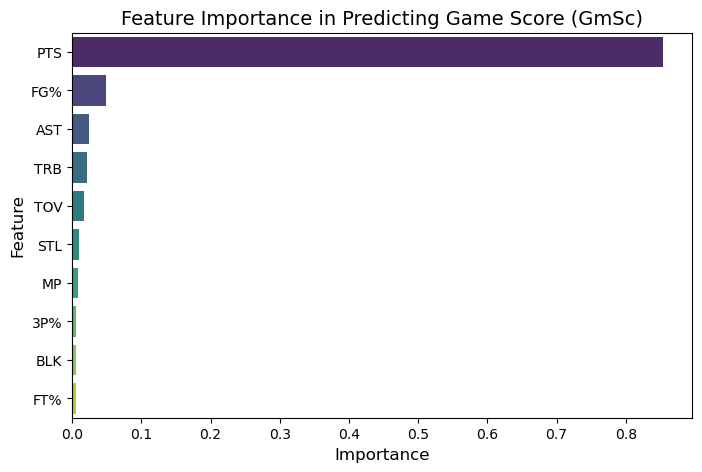

In [15]:
# Extract feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in Predicting Game Score (GmSc)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

1.	Scoring is the Most Important Factor:
	•	Both models identified Points Scored (PTS) as the most critical driver of Game Score, contributing over 85% of the importance. This emphasizes that a player’s ability to score is the single most significant measure of their efficiency during a game.
    
	•	This aligns with common basketball strategy: scoring is essential to winning games, and efficient scorers contribute the most value.
    
2.	Shooting Accuracy Matters:
	•	Field Goal Percentage (FG%) ranked second, though its importance was far lower than PTS. This highlights the importance of not just taking shots but making them efficiently. Players who shoot well are more valuable, even if they don’t score as much as high-volume shooters.
    
3.	Supporting Metrics Add Value:
	•	Metrics like Assists (AST) and Rebounds (TRB) had moderate importance. While they don’t have the same weight as scoring, they contribute to team success and can differentiate well-rounded players from one-dimensional scorers.
    
	•	Defensive contributions, such as Steals (STL) and Blocks (BLK), were less influential, but they still play a role in boosting efficiency.
    
4.	Playing Time is Surprisingly Less Important:
	•	Minutes Played (MP) had very low importance in both models. This means that simply being on the court longer does not guarantee better efficiency. Instead, what players do during their time on the court matters most.

# Model Validation

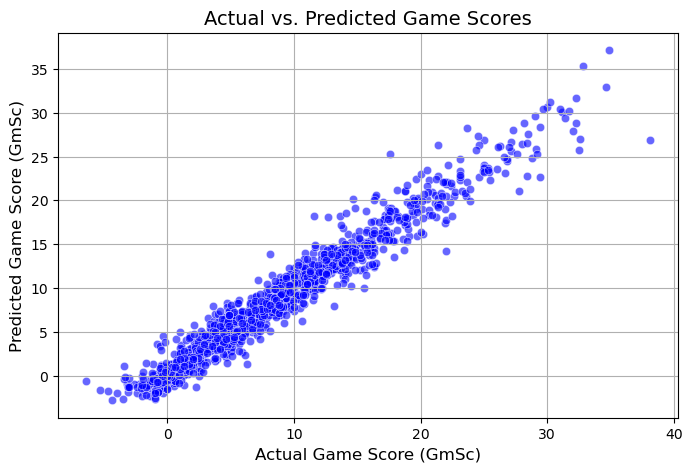

In [16]:
# Compare predicted vs. actual values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.title('Actual vs. Predicted Game Scores', fontsize=14)
plt.xlabel('Actual Game Score (GmSc)', fontsize=12)
plt.ylabel('Predicted Game Score (GmSc)', fontsize=12)
plt.grid(True)
plt.show()

1.	Strong Linear Relationship:
	•	The points are closely clustered along the diagonal line, which represents perfect predictions. This indicates that the model is highly accurate, with minimal deviation between predicted and actual Game Scores.
    
2.	Accuracy Across the Range:
	•	The model performs consistently well across all levels of player performance, from low Game Scores (bench players) to high Game Scores (star performers). The tight clustering shows the model’s ability to generalize across different types of players.
    
3.	Outliers:
	•	While most points lie near the diagonal, there are a few outliers where the predicted Game Score slightly overestimates or underestimates the actual values. These deviations could be due to factors not captured in the dataset, such as game context, matchups, or specific player roles.

This visualization reinforces the high performance of the machine learning models, particularly their ability to predict Game Scores with strong precision. It also validates the feature importance findings by demonstrating how metrics like points scored and shooting percentages reliably translate into accurate efficiency predictions.

# Key Takeaways

Through this project, I’ve been able to uncover the key factors that drive player efficiency in the NBA. The analysis clearly showed that scoring is the most significant contributor to efficiency, with Points Scored (PTS) leading the way. This makes sense—players who can consistently score have the greatest impact on their team’s success. Additionally, metrics like Field Goal Percentage (FG%) and Free Throw Percentage (FT%) highlight the importance of shooting accuracy, reinforcing that it’s not just about how much a player scores, but how efficiently they do it.

I also discovered that assists and rebounds play a supporting role in driving player performance. These metrics might not carry the same weight as scoring, but they’re still crucial for well-rounded contributions. Interestingly, Minutes Played (MP) had very little impact on efficiency, showing me that it’s not about how long players are on the court but what they accomplish during their time there.

The machine learning models I used—Random Forest and Gradient Boosting—performed exceptionally well, with the Gradient Boosting model achieving a very high accuracy. These results validate the importance of the selected metrics and give me confidence in the insights I’ve drawn.

Overall, this project helped me understand what makes players efficient and provided valuable insights that could be used to guide training, strategy, and even player evaluations. I’m excited about how these findings could be applied to improve individual and team performance, and I look forward to exploring more ways that data can impact basketball.